# Machine Learning Engineer Nanodegree

## Capstone project: Exoplanet search (from Kaggle)

Student Name: Graciano Patino

Kaggle reference: https://www.kaggle.com/keplersmachines/kepler-labelled-time-series-data?/

The mission as stated in the Github (https://github.com/winterdelta/KeplerAI) is to build a classification algorithm for identifying if a particular time series input includes an exoplanet or not. It also mentions that a number of methods were tested: 1-D CNN in Torch7, XGBoost in R and PCA in Python. However, none of these methods provided strong results according to the kaggle and Github references. 

For this project, I would evaluate deep learning algorithms. Per paper in the paragraph (below), these algorithms appear to provide better results compared to the ones already tried as mentioned above.

1)	Initially I would evaluate 1-D CNN using Keras instead of Torch7. 
2)	Based on reference paper, I would try adding different number of layers and filters in combination with other CNN parameters. Details would be included in project report.
3)	The output of the CNNs would be the input to one or more dense layers.
4)	Performance of each model to be measured as per evaluation metrics section.
5)	Per kaggle source the test set is confirmed to have 5 exoplanets. This will also be useful on checking performance of algorithms. If an algorithm is unable to identify exoplanets on then testing set, then model might not be good. 

Please that the list above of models considered is not meant to be exhaustive for all possible scenarios in deep learning algorithms. It might be the case that other deep learning algorithms might be considered later should the ones proposed (above) fail in identifying any exoplanet as expected.


### Project design

The workflow for solving this problem would have the following order:

    1) Exploring the datasets (check dimensions of data, labels, etc.)
    2) Data preprocessing: 
    2.1) The datasets provided by kaggle are supposed to be clean (for the most part).
    2.2) It is noted that the data is not normalized. (Some normalization is required.)
    2.3) Github reference (above) mentions that techniques like data augmentation could help as we are dealing with time series. Perhaps systematically shifting rows and adding noise could generate additional realistic (albeit synthetic) trends. This might be explored depending on results from the different algorithms tested for solving the problem.
    3) Evaluate machine learning algorithms: This involves building the models and selecting best model by using evaluation metrics and comparing to benchmark model(s).
    4) Model tuning to optimize results: This involves using evaluating performance of the model and fine tuning hyper-parameters until a satisfactory model is identified. This is by using evaluation metrics to evaluate performance.
    5) Final conclusions.


In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
import itertools
from IPython.display import display # Allows the use of display() for DataFrames
from get_results_v2 import plot_roc_auc, confusion_matrix_com

# Pretty display for notebooks
%matplotlib inline

# Some Sklearn libraries are required
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.utils.fixes import signature
from sklearn.metrics import average_precision_score

In [2]:
# Load the training data from Exoplanet dataset
train_data = pd.read_csv('kepler/exoTrain.csv')

In [3]:
# Find dimensions of the train data
train_data.shape

(5087, 3198)

In [4]:
# Getting X_train and y_train
# Using iloc to select data using position instead of label and converting to numpy array using values
X_train = train_data.iloc[:,1:].values 
y_train = train_data.iloc[:,0:1].values 

In [5]:
# Find dimensions of the X_train data
X_train.shape

(5087, 3197)

In [6]:
# Find dimensions of the labels (y_train) data
y_train.shape

(5087, 1)

In [7]:
# y_train: Label is 2 for exoplanet and 1 for non-exoplanet
y_train[:5]

array([[2],
       [2],
       [2],
       [2],
       [2]])

In [8]:
y_train -= 1 # Changing labels to: 1 for exoplanet and 0 for non-exoplanet

In [9]:
y_train[:5]

array([[1],
       [1],
       [1],
       [1],
       [1]])

In [10]:
# Load the testing data from Exoplanet dataset
test_data = pd.read_csv('kepler/exoTest.csv')

In [11]:
# Find dimensions of the test data
test_data.shape

(570, 3198)

In [12]:
# Getting X_test and y_test
# Using iloc to select data using position instead of label and converting to numpy array (using values)
X_test = test_data.iloc[:,1:].values
y_test = test_data.iloc[:,0:1].values

In [13]:
# Find dimensions of the X_test data
X_test.shape

(570, 3197)

In [14]:
# Find dimensions of the labels (y_test) data
y_test.shape

(570, 1)

In [15]:
# y_test: Label is 2 for exoplanet and 1 for non-exoplanet
y_test[:6]

array([[2],
       [2],
       [2],
       [2],
       [2],
       [1]])

In [16]:
y_test -= 1 # Changing labels to: 1 for exoplanet and 0 for non-exoplanet

In [17]:
y_test[:6]

array([[1],
       [1],
       [1],
       [1],
       [1],
       [0]])

In [18]:
# Normalizing the data since it is not normalized according to Kaggle/Github
from sklearn.preprocessing import StandardScaler

In [19]:
# Checking X_train data
X_train

array([[  93.85,   83.81,   20.1 , ...,   61.42,    5.08,  -39.54],
       [ -38.88,  -33.83,  -58.54, ...,    6.46,   16.  ,   19.93],
       [ 532.64,  535.92,  513.73, ...,  -28.91,  -70.02,  -96.67],
       ..., 
       [ 273.39,  278.  ,  261.73, ...,   88.42,   79.07,   79.43],
       [   3.82,    2.09,   -3.29, ...,  -14.55,   -6.41,   -2.55],
       [ 323.28,  306.36,  293.16, ...,  -16.72,  -14.09,   27.82]])

In [20]:
# Tranposing X_train before applying scaling such that mean is zero and variance is one
X_train.transpose()

array([[  93.85,  -38.88,  532.64, ...,  273.39,    3.82,  323.28],
       [  83.81,  -33.83,  535.92, ...,  278.  ,    2.09,  306.36],
       [  20.1 ,  -58.54,  513.73, ...,  261.73,   -3.29,  293.16],
       ..., 
       [  61.42,    6.46,  -28.91, ...,   88.42,  -14.55,  -16.72],
       [   5.08,   16.  ,  -70.02, ...,   79.07,   -6.41,  -14.09],
       [ -39.54,   19.93,  -96.67, ...,   79.43,   -2.55,   27.82]])

In [21]:
# # Checking X_train data
X_test

array([[  1.19880000e+02,   1.00210000e+02,   8.64600000e+01, ...,
          3.57800000e+01,   2.69430000e+02,   5.77200000e+01],
       [  5.73659000e+03,   5.69998000e+03,   5.71716000e+03, ...,
         -2.36619000e+03,  -2.29486000e+03,  -2.03472000e+03],
       [  8.44480000e+02,   8.17490000e+02,   7.70070000e+02, ...,
         -1.62680000e+02,  -3.67900000e+01,   3.06300000e+01],
       ..., 
       [ -5.40100000e+01,  -4.41300000e+01,  -4.12300000e+01, ...,
          5.47000000e+00,   1.44600000e+01,   1.87000000e+01],
       [  9.13600000e+01,   8.56000000e+01,   4.88100000e+01, ...,
         -8.43000000e+00,  -6.48000000e+00,   1.76000000e+01],
       [  3.07119000e+03,   2.78253000e+03,   2.60869000e+03, ...,
         -2.77220000e+02,  -6.96300000e+01,   1.21560000e+02]])

In [22]:
# Tranposing X_test before applying scaling such that mean is zero and variance is one
X_test.transpose()

array([[  1.19880000e+02,   5.73659000e+03,   8.44480000e+02, ...,
         -5.40100000e+01,   9.13600000e+01,   3.07119000e+03],
       [  1.00210000e+02,   5.69998000e+03,   8.17490000e+02, ...,
         -4.41300000e+01,   8.56000000e+01,   2.78253000e+03],
       [  8.64600000e+01,   5.71716000e+03,   7.70070000e+02, ...,
         -4.12300000e+01,   4.88100000e+01,   2.60869000e+03],
       ..., 
       [  3.57800000e+01,  -2.36619000e+03,  -1.62680000e+02, ...,
          5.47000000e+00,  -8.43000000e+00,  -2.77220000e+02],
       [  2.69430000e+02,  -2.29486000e+03,  -3.67900000e+01, ...,
          1.44600000e+01,  -6.48000000e+00,  -6.96300000e+01],
       [  5.77200000e+01,  -2.03472000e+03,   3.06300000e+01, ...,
          1.87000000e+01,   1.76000000e+01,   1.21560000e+02]])

In [23]:
# Standardize features by removing the mean and scaling to unit variance (sklearn.preprocessing)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) # Output in a numpy.ndarray
X_test = scaler.fit_transform(X_test) # Output in a numpy.ndarray

In [24]:
X_train.transpose() # Transpose back to original dimensions

array([[-0.00235557, -0.00852774,  0.01804893, ...,  0.00599336,
        -0.00654212,  0.00831333],
       [-0.00205404, -0.0074516 ,  0.01868969, ...,  0.00685579,
        -0.00580352,  0.00815701],
       [-0.00579778, -0.00938685,  0.01673115, ...,  0.00523005,
        -0.00686528,  0.00666449],
       ..., 
       [ 0.0341983 ,  0.03109682,  0.02910084, ...,  0.03572195,
         0.0299112 ,  0.02978874],
       [ 0.02736753,  0.02803863,  0.02275218, ...,  0.03191466,
         0.0266614 ,  0.02618942],
       [ 0.01805157,  0.02216476,  0.01410023, ...,  0.02628002,
         0.02060995,  0.02271046]])

In [25]:
X_test.transpose() # Transpose back to original dimensions

array([[-0.03143654,  0.41497541,  0.02615413, ..., -0.04525719,
        -0.03370329,  0.20313139],
       [-0.05057432,  0.39343385,  0.00629912, ..., -0.0620191 ,
        -0.05173276,  0.16210798],
       [-0.03559448,  0.41363759,  0.01894572, ..., -0.04578193,
        -0.0385983 ,  0.16563567],
       ..., 
       [-0.00907555, -0.2624662 , -0.03001166, ..., -0.01227304,
        -0.01373939, -0.04209481],
       [ 0.00470934, -0.26591026, -0.02760726, ..., -0.02219864,
        -0.02440852, -0.03107299],
       [-0.00786554, -0.22375419, -0.01066057, ..., -0.01189145,
        -0.01200494, -0.00127881]])

In [26]:
# Fix random seed for reproducibility
seed = 10
np.random.seed(seed)

In [27]:
# In this cell, the train is being broken up into two sets: train and validation.
# By using stratify parameter, data is split in a stratified fashion, using this as the class labels.
from sklearn.model_selection import train_test_split

X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=10, stratify=y_train)

In [28]:
# Checking how many exoplanets are in validation set (20% would be ~ 7 exoplanets)
y_val.sum()

7

In [29]:
# Checking how many exoplanets are in new training set (80% would be ~ 30 exoplanets)
y_train_new.sum()

30

In [30]:
X_train_new.shape

(4069, 3197)

In [31]:
y_train_new.shape

(4069, 1)

In [32]:
# Testing adding augmentation by using Numpy fliplr technique (reversing the other of the time series on each
# entry with exoplanet = 1)

exoyes = X_train_new[y_train_new[:,0] == 1]
X_rev = np.fliplr(exoyes)
X_t = np.vstack([X_rev, X_train_new])
y_t = np.hstack([np.ones(len(X_rev)), y_train_new[:,0]])


In [33]:
exoyes.shape

(30, 3197)

In [34]:
X_rev.shape

(30, 3197)

In [35]:
X_t.shape

(4099, 3197)

In [36]:
y_t.shape

(4099,)

In [37]:
y_t.sum()

60.0

In [38]:
from keras.models import Sequential, Model
from keras.layers import Conv1D, MaxPool1D, Dense, Dropout, Flatten
from keras.layers import BatchNormalization, Input, concatenate, Activation
from keras.optimizers import Adam, Nadam, SGD
from keras.callbacks import ModelCheckpoint 

Using TensorFlow backend.


In [39]:
#Convert data into 3d tensor (Input 0 in Conv1D is incompatible with layer conv1d_1: expected ndim=3, found ndim=2)
X_t = np.reshape(X_t,(X_t.shape[0],X_t.shape[1],1))
X_val = np.reshape(X_val,(X_val.shape[0],X_val.shape[1],1))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

In [40]:
# Checking shape of X_test tensor
X_test.shape

(570, 3197, 1)

In [41]:
# Checking shape of X_train_new tensor
X_t.shape

(4099, 3197, 1)

In [42]:
# Checking shape of X_val tensor
X_val.shape

(1018, 3197, 1)

In [43]:
# Create model
model = Sequential()

# Parameters
dropout_rate=0.2
filters=4
activation='relu'
init_mode='uniform'

# Defining network architecture

model.add(Conv1D(filters=filters, kernel_size=6, kernel_initializer=init_mode, activation=activation, input_shape=(3197,1)))
model.add(Conv1D(filters=filters, kernel_size=6, kernel_initializer=init_mode, activation=activation))
model.add(MaxPool1D(strides=4))
model.add(Dropout(dropout_rate))
model.add(BatchNormalization())
model.add(Conv1D(filters=filters*2, kernel_size=6, kernel_initializer=init_mode, activation=activation))
model.add(Conv1D(filters=filters*2, kernel_size=6, kernel_initializer=init_mode, activation=activation))
model.add(MaxPool1D(strides=4))
model.add(Dropout(dropout_rate))
model.add(BatchNormalization())
model.add(Conv1D(filters=filters*4, kernel_size=6, kernel_initializer=init_mode, activation=activation))
model.add(Conv1D(filters=filters*4, kernel_size=6, kernel_initializer=init_mode, activation=activation))
model.add(MaxPool1D(strides=4))
model.add(Dropout(dropout_rate))
model.add(BatchNormalization())
model.add(Conv1D(filters=filters*8, kernel_size=6, kernel_initializer=init_mode, activation=activation))
model.add(Conv1D(filters=filters*8, kernel_size=6, kernel_initializer=init_mode, activation=activation))
model.add(MaxPool1D(strides=4))
model.add(Dropout(dropout_rate))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(filters*8, activation=activation, kernel_initializer=init_mode))
model.add(Dropout(dropout_rate))
model.add(Dense(1, kernel_initializer=init_mode, activation='sigmoid'))

# summarize the model
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_1 (Conv1D)            (None, 3192, 4)           28        
_________________________________________________________________
conv1d_2 (Conv1D)            (None, 3187, 4)           100       
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 797, 4)            0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 797, 4)            0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 797, 4)            16        
_________________________________________________________________
conv1d_3 (Conv1D)            (None, 792, 8)            200       
_________________________________________________________________
conv1d_4 (Conv1D)            (None, 787, 8)            392       
__________

In [44]:

model.compile(optimizer=Adam(lr=1e-5), loss="binary_crossentropy", metrics=["mse"])

# train the model
checkpointer = ModelCheckpoint(filepath='model-f4-ks6-8cnn-YD-2dnn-YD_fliplr_mse_adam_relu_30epochs.weights.best.hdf5', verbose=1, save_best_only=True)

history = model.fit(X_t, y_t, batch_size=80, epochs=30, validation_data=(X_val, y_val), callbacks=[checkpointer], 
          verbose=2, shuffle=False)

Train on 4099 samples, validate on 1018 samples
Epoch 1/30
Epoch 00000: val_loss improved from inf to 0.69271, saving model to model-f4-ks6-8cnn-YD-2dnn-YD_fliplr_mse_adam_relu_30epochs.weights.best.hdf5
8s - loss: 0.6927 - mean_squared_error: 0.2498 - val_loss: 0.6927 - val_mean_squared_error: 0.2498
Epoch 2/30
Epoch 00001: val_loss improved from 0.69271 to 0.69226, saving model to model-f4-ks6-8cnn-YD-2dnn-YD_fliplr_mse_adam_relu_30epochs.weights.best.hdf5
8s - loss: 0.6912 - mean_squared_error: 0.2490 - val_loss: 0.6923 - val_mean_squared_error: 0.2496
Epoch 3/30
Epoch 00002: val_loss improved from 0.69226 to 0.69178, saving model to model-f4-ks6-8cnn-YD-2dnn-YD_fliplr_mse_adam_relu_30epochs.weights.best.hdf5
8s - loss: 0.6883 - mean_squared_error: 0.2476 - val_loss: 0.6918 - val_mean_squared_error: 0.2493
Epoch 4/30
Epoch 00003: val_loss improved from 0.69178 to 0.69128, saving model to model-f4-ks6-8cnn-YD-2dnn-YD_fliplr_mse_adam_relu_30epochs.weights.best.hdf5
8s - loss: 0.6820 -

In [45]:
print(history.history.keys())

dict_keys(['val_mean_squared_error', 'val_loss', 'loss', 'mean_squared_error'])


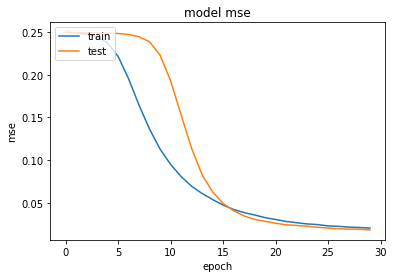

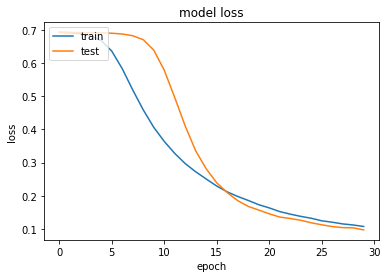

In [46]:
# summarize history for mean squared error
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('model mse')
plt.ylabel('mse')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
# load the weights that yielded the best validation accuracy
model.load_weights(filepath='model-f4-ks6-8cnn-YD-2dnn-YD_fliplr_mse_adam_relu_30epochs.weights.best.hdf5')

y_prob = model.predict(X_test)

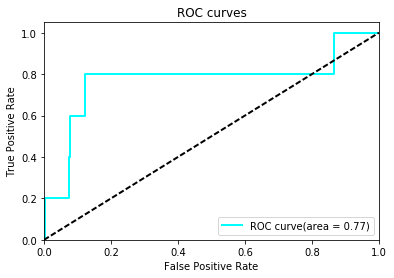

Score: 0.771


In [48]:
plot_roc_auc(y_test, y_prob)

In [49]:
roc_auc_score(y_test, y_prob)

0.77132743362831857

In [50]:
y_prob[0:10]

array([[ 0.50039548],
       [ 0.52760035],
       [ 0.50179529],
       [ 0.493184  ],
       [ 0.5019092 ],
       [ 0.49855995],
       [ 0.49349794],
       [ 0.49826652],
       [ 0.49482694],
       [ 0.50256306]], dtype=float32)

In [51]:
confusion_matrix_com(y_test, y_prob, thresh=0.5)

Confusion matrix:
 [[486  79]
 [  1   4]] 

             precision    recall  f1-score   support

    class 0       1.00      0.86      0.92       565
    class 1       0.05      0.80      0.09         5

avg / total       0.99      0.86      0.92       570



In [55]:
confusion_matrix_com(y_test, y_prob, thresh=0.52)

Confusion matrix:
 [[562   3]
 [  4   1]] 

             precision    recall  f1-score   support

    class 0       0.99      0.99      0.99       565
    class 1       0.25      0.20      0.22         5

avg / total       0.99      0.99      0.99       570



In [56]:
confusion_matrix_com(y_test, y_prob, thresh=0.493)

Confusion matrix:
 [[ 75 490]
 [  0   5]] 

             precision    recall  f1-score   support

    class 0       1.00      0.13      0.23       565
    class 1       0.01      1.00      0.02         5

avg / total       0.99      0.14      0.23       570

